In [1]:
import numpy as np 
import pandas as pd

In [3]:
df=pd.read_csv("C:/Users/MSI/Downloads/archive (20)/Reviews.csv")

In [12]:
df.sample(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
525631,525632,B002JL0MT2,A2C7MG0YA9P3GB,Patricia Heredia,0,0,5,1317081600,Taste good!,I bought these for my wedding I added them to ...
557810,557811,B0021L9XK4,A338UAWRI8M2A7,pepper45322,0,1,5,1296000000,The only energy drink that does not give me he...,I have tried other brands of energy drinks and...
58630,58631,B0009YD7P2,A2GK2NODLRSUIB,"J. Pilles ""Love my pups""",0,0,5,1231718400,They love peanut butter in their Kong,My little guys love to have their Kongs filled...
497712,497713,B000HDK0D2,A3KVJQZM7GNBEK,Tara,0,0,5,1342051200,Delicious!,This product is a great one for someone obsess...
86659,86660,B000F9Z29U,ABK61YXJY9BRJ,"Carol J. Morris ""grandma46706""",0,0,5,1269129600,Very good bars.,These are very good bars and being individuall...
343298,343299,B000WFEN74,A34UV2FFXJPS3T,Susan Ackoff,2,2,5,1294185600,Great Cat Food,Wellness wet cat food is terrific.<br />My thr...
331026,331027,B001D0676C,A8FYP62N41J1S,lkwilkins,0,0,5,1295136000,enjoyable pizza,I made this crust into one medium size pizza w...
524985,524986,B003Z3W232,A27DMJZDBHE6ZD,O.F.,0,0,5,1320105600,Excellent,Excellent taste and texture. I used this prod...
319061,319062,B004SBELRU,A920YQSKVECLQ,"Ontos Crewman ""0311 0353""",0,0,4,1325203200,"Japanese, not Korean",While this sauce can be used to make a present...
540592,540593,B001D0GV90,A6YN5508K6YBP,Karen B Mielke,4,4,5,1192060800,Fantastic Coffee,Definately the best K-Cup coffee out there. Th...


In [7]:
df.shape

(568454, 10)

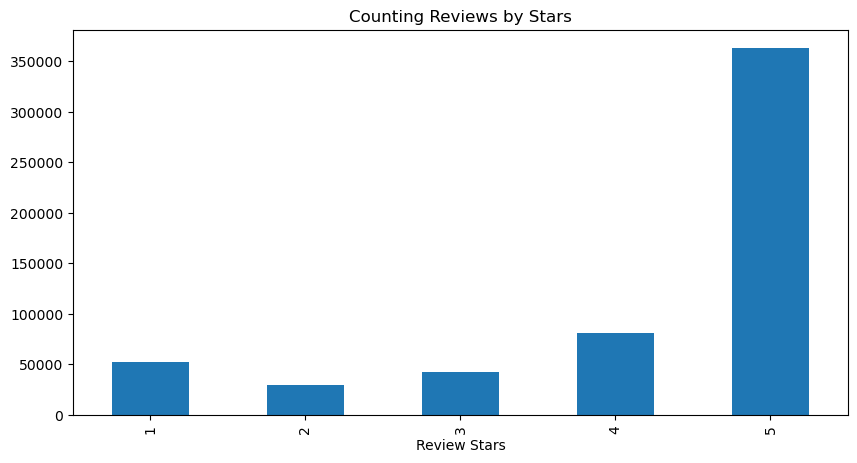

In [16]:
import matplotlib.pyplot as plt
fa = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Counting Reviews by Stars',
          figsize=(10, 5))
fa.set_xlabel('Review Stars')
plt.show()

In [30]:
import nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
sia.polarity_scores('I am so excited!')


{'neg': 0.0, 'neu': 0.401, 'pos': 0.599, 'compound': 0.4561}

In [36]:
sia.polarity_scores('I hate this.')

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [40]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [42]:
new_df = pd.DataFrame(res).T
new_df = new_df.reset_index().rename(columns={'index': 'Id'})
new_df = new_df.merge(df, how='left')

In [44]:
new_df.sample(10) #here is our sentiment analysis score 

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
